In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
os_loc = os.getcwd()

In [3]:
bike = pd.read_csv(os_loc + '/bike_data/train.csv', encoding = 'cp949')

In [4]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Feature selection

## Removing Features with low variance

### VarianceThreshold : 분산이 임계값을 넘지 못하는 feature를 제거한다.

In [6]:
bike.iloc[:,2:4]

,holiday,workingday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10881,0,1
10882,0,1
10883,0,1
10884,0,1


In [7]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,2:4]
sel = VarianceThreshold(threshold = (.8 * ( 1- .8)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
# threshold = (.8 * ( 1- .8)) -> 데이터의 분포가 한쪽으로 치우쳐진 정도가 80%이상인 값을 제거.
sel.fit_transform(X)
# holiday 컬럼 제거

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [8]:
round(bike['holiday'].value_counts() / sum(bike['holiday'].value_counts().values) * 100,2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [9]:
bike.iloc[:,1:5]

,season,holiday,workingday,weather
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10881,4,0,1,1
10882,4,0,1,1
10883,4,0,1,1
10884,4,0,1,1


In [10]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,1:5]
sel = VarianceThreshold(threshold = (.8 * ( 1- .8)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
sel.fit_transform(X)


array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [4, 1, 1],
       [4, 1, 1],
       [4, 1, 1]], dtype=int64)

In [11]:
for i in X.columns:
    print(round(bike[i].value_counts() / sum(bike[i].value_counts().values) * 100,2), end = "\n")

4    25.11
3    25.11
2    25.11
1    24.67
Name: season, dtype: float64
0    97.14
1     2.86
Name: holiday, dtype: float64
1    68.09
0    31.91
Name: workingday, dtype: float64
1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64


In [12]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,1:5]
sel = VarianceThreshold(threshold = (.6 * ( 1- .6)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
sel.fit_transform(X)


array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [4, 1],
       [4, 1],
       [4, 1]], dtype=int64)

In [13]:
np.var(bike.workingday)

0.21728440883623767

In [14]:
.6 * .4

0.24

#### 카테고리 특성에 대해 원핫인코딩을 진행한 후 사용하기 좋아 보인다.

### strftime() : 날짜 형식 변환 메서드
#### ◆ %d : 0을 채운 10진수 표기로 날짜를 표시
#### ◆ %m : 0을 채운 10진수 표기로 월을 표시
#### ◆ %y : 0을 채운 10진수 표기로 2자리 년도
#### ◆ %Y : 0을 채운 10진수 표기로 4자리 년도
#### ◆ %H : 0을 채운 10진수 표기로 시간 (24시간 표기)
#### ◆ %I : 0을 채운 10진수 표기로 시간 (12시간 표기)
#### ◆ %M : 0을 채운 10진수 표기로 분
#### ◆ %S : 0을 채운 10진수 표기로 초

In [4]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [5]:
bike['year'] = bike['datetime'].dt.strftime('%Y')
bike['month'] = bike['datetime'].dt.strftime('%m')
bike['day'] = bike['datetime'].dt.strftime('%d')
bike['hour'] = bike['datetime'].dt.strftime('%H')

In [6]:
bike.drop(['datetime'], axis = 1, inplace=True)

In [7]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


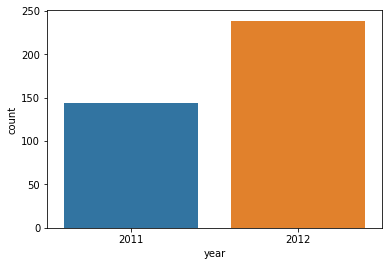

In [19]:
sns.barplot(x ='year', y = 'count', data = bike.groupby(bike['year'])['count'].mean().reset_index())
plt.show()

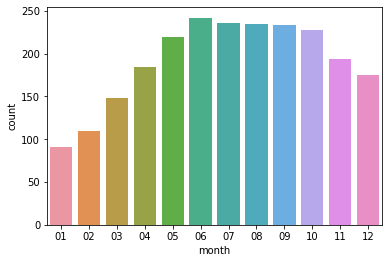

In [20]:
sns.barplot(x ='month', y = 'count', data = bike.groupby(bike['month'])['count'].mean().reset_index())
plt.show()

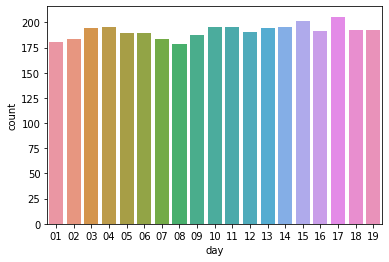

In [21]:
sns.barplot(x ='day', y = 'count', data = bike.groupby(bike['day'])['count'].mean().reset_index())
plt.show()

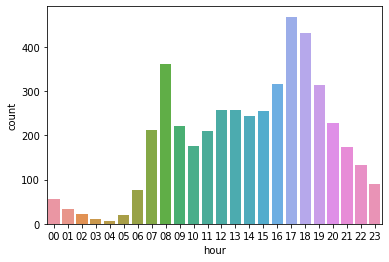

In [22]:
sns.barplot(x ='hour', y = 'count', data = bike.groupby(bike['hour'])['count'].mean().reset_index())
plt.show()

In [23]:
bike_dum = pd.get_dummies(bike, columns = ['season', 'holiday', 'workingday' , 'weather', 'year', 'month', 'day', 'hour'])

In [24]:
bike_dum

,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,3,13,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,8,32,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,5,27,32,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,3,10,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,10,231,241,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,4,164,168,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,12,117,129,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Univariate feature selection
### SelectKbest : target 변수와 그외 다른 변수들 사이의 상관관계를 구하여 상관관계가 높은 k개의 변수를 선택하는 방법이다
### <a href = "https://blog.naver.com/PostView.nhn?blogId=now2go&logNo=222119231886&parentCategoryNo=&categoryNo=21&viewDate=&isShowPopularPosts=true&from=search">참고</a>

In [25]:
X = bike_dum.drop(['count'], axis = 1)
Y = bike_dum['count']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [27]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_Kbest = SelectKBest(chi2, k = 20).fit_transform(X_train, y_train)
# score_func : 상관관계의 p-value를 구할 방법을 설정하는 파라미터
#  분류방식에 chi2, f_classif, mutual_info_classif 방법이 있다.
#  회귀방식에 f_regression, mutual_info_regression 방법이 있다.
# k : 선택될 변수의 갯수를 설정하는 파라미터이다.
X_Kbest.shape

(7620, 20)

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func = chi2, k = 20)
X_Kbest = selector.fit_transform(X_train, y_train)

In [29]:
all_feats = X_train.columns

selected_feat = selector.get_support()

selected_feat_names = all_feats[selected_feat]

print("Select Columns : ", selected_feat_names)

Select Columns :  Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'month_06', 'month_09', 'hour_03', 'hour_04', 'hour_05', 'hour_08',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19'],
      dtype='object')


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func = f_classif, k = 20)
X_Kbest = selector.fit_transform(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [31]:
all_feats = X_train.columns

selected_feat = selector.get_support()

selected_feat_names = all_feats[selected_feat]

print("Select Columns : ", selected_feat_names)

Select Columns :  Index(['temp', 'atemp', 'humidity', 'casual', 'registered', 'season_1',
       'season_3', 'year_2011', 'year_2012', 'month_06', 'month_09', 'hour_03',
       'hour_04', 'hour_05', 'hour_08', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19'],
      dtype='object')


### SelectPercentile : 지정된 비율만큼 feature를 선택한다.

In [32]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(percentile = 30)
#score_func : SelectKBest와 같이 상관관계의 p-value를 구할 방법을 설정하는 파라미터이다.
#percentile : 선택될 feature의 비율을 설정한다.
X_Perc = selector.fit_transform(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [33]:
print(X_train.shape)
print(X_Perc.shape)

(7620, 75)
(7620, 23)


### SelectFpr : FPR(False Positive Rate)를 기반으로 feature를 선택한다. 
#### ※ FPR : 1종오류로 귀무가설이 실제로 참이지만, 이에 불구하고 귀무가설을 기각하는 오류
### SelectFdr : FDR(False Discovery Rate)를 기반으로 feature를 선택한다.
#### ※ FDR : 유의하다고 판단한 것 중에 실제로는 유의하지 않은 것의 비율( FDR = False Positive / Total Positive) <a href = "http://www.incodom.kr/False_discovery_rate">참고 1</a>  <a href="https://3months.tistory.com/262">참고2</a>
### selectFwe : FWER(Family-Wise Error Rate)를 기반으로 feature를 선택한다.
#### ※ FWER : 여러번의 가설검정을 실시할때 적어도 하나의 가설에서 1종오류가 발생할 가능성 <a href = "https://be-favorite.tistory.com/25">참고</a>

### GenericUnivariateSelect : 단변량 변수를 선택할 수 있는 분류기

## Recursive feature elimination
### <a href = "https://process-mining.tistory.com/138"> 참고 </a>
### RFE : 재귀적 특성 제거 방법으로 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 이를 반복한다. (모델에 모든 feature를 학습하고 모델의 feature importance를 통해 가장 낮은 feature를 제거하는 작업을 원하는 변수의 갯수만큼 반복하여 feature를 선정한다.
### RFECV : RFECV는 Recursive feature elimination with Cross Validation으로 RFE방식과 동일한 방법으로 진행하지만 정해진 갯수를 선택하지않고 각 feature마다 K-fold vaildation과 같은 cross validation을 진행하여 각기 다른 성능을 도출한다.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
# estimator : 지도학습 모델
# n_features_to_select : 선택할 feature의 갯수
# step : 반복할 때 마다 제거될 feature의 개수, 0~1사이의 값이 입력되면 반복할 때마다 제거될 feature의 갯수를 백분율로 선정한다.
# verbose : 출력을 제어한다. (무엇을 의미하는지 이해가 되진 않음.)
# importance_getter : default값은 'auto'로 'auto'일때 'coef_'나 'feature_importances_'로 특성의 중요도를 구할 수 있다.
selector = selector.fit(X_train, y_train)
selector.feature_names_in_

array(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10',
       'month_11', 'month_12', 'day_01', 'day_02', 'day_03', 'day_04',
       'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'hour_00', 'hour_01', 'hour_02',
       'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07', 'hour_08',
       'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'], dtype=object)

In [35]:
selector.ranking_

array([ 1, 14,  9, 20,  1,  1, 15, 11,  1,  1, 23, 26,  1,  1,  1,  5, 17,
       31,  1,  3, 40, 19,  1, 46,  1,  1,  1, 12, 35,  1, 41, 43, 47,  8,
       13, 53, 54,  1, 39,  1, 16, 22, 33, 32, 29, 28, 38, 42, 21, 45, 10,
       37,  7,  4,  6,  1,  1, 44, 34, 27, 24, 36, 30,  1, 18,  1, 25,  2,
       48, 49, 50, 51, 52, 55, 56])

In [36]:
selector.get_feature_names_out(input_features=None)

array(['temp', 'casual', 'registered', 'season_3', 'season_4',
       'workingday_0', 'workingday_1', 'weather_1', 'year_2011',
       'month_03', 'month_05', 'month_06', 'month_07', 'month_10',
       'day_06', 'day_08', 'hour_04', 'hour_05', 'hour_12', 'hour_14'],
      dtype=object)

## Feature selection using SelectFromModel

### L1-based feature selection : L1규제가 적용된 선형모델로 대부분의 추정계수가 0으로 추정된다. 여기서 SelectFromeModel을 이용하여 0이 아닌 계수를 추출할 수 있다. 유용한 모델로 회귀분석, 로지스틱 회귀분석, 라쏘회귀가 있다.

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
#prefit : defalut는 False로 True이면 transform을 직접 호출하고, cross_val_score, GridSearchCV 및 Estimator를 복제하는 유틸리티를 사용할 수 없다.
X_new = model.transform(X_train)
X_new.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(7620, 8)

In [38]:
X_new

array([[ 16.4  ,  20.455,  82.   , ...,   4.   ,   0.   ,   1.   ],
       [ 26.24 ,  31.06 ,  44.   , ..., 360.   ,   0.   ,   1.   ],
       [  9.02 ,  11.365,  55.   , ..., 265.   ,   1.   ,   1.   ],
       ...,
       [ 13.94 ,  16.665,  87.   , ..., 208.   ,   0.   ,   0.   ],
       [  4.92 ,   6.06 ,  50.   , ...,   6.   ,   1.   ,   1.   ],
       [ 14.76 ,  18.94 , 100.   , ..., 175.   ,   0.   ,   0.   ]])

In [39]:
from sklearn import linear_model 
from sklearn.feature_selection import SelectFromModel

clf = linear_model.Lasso(alpha = 0.05)
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.05))

In [40]:
model.n_features_in_

75

In [41]:
print(model.estimator_.coef_)

[ 0.          0.         -0.          0.          0.99997963  1.00000115
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.        ]


In [42]:
model.get_feature_names_out(input_features=None)

array(['casual', 'registered'], dtype=object)

In [43]:
X = X.drop(['casual', 'registered'],axis = 1)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [45]:
from sklearn import linear_model 
from sklearn.feature_selection import SelectFromModel

clf = linear_model.Lasso(alpha = 0.5)
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.5))

In [46]:
model.n_features_in_

73

In [47]:
print(model.estimator_.coef_)

[ 4.58888307e+00  1.70932879e+00 -1.07773786e+00 -2.99456684e-01
 -3.01850921e+01  0.00000000e+00 -1.14628371e+01  3.10580422e+01
  0.00000000e+00 -0.00000000e+00 -3.11404122e+00  5.49277244e-16
  6.44359144e+00  0.00000000e+00 -4.44527029e+01 -0.00000000e+00
 -8.18054221e+01  0.00000000e+00 -1.02587038e+01 -0.00000000e+00
  4.12598204e+00 -0.00000000e+00  1.28304065e+01  0.00000000e+00
 -1.69427254e+01 -0.00000000e+00  2.46525800e+01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.58761363e+00 -0.00000000e+00
 -0.00000000e+00 -1.21363267e+02 -1.40443294e+02 -1.49467718e+02
 -1.56436176e+02 -1.59847861e+02 -1.44526601e+02 -8.38997455e+01
  1.99339104e+01  1.64364773e+02  1.97096590e+01 -1.57109204e+01
 -0.00000000e+00  2.67957

In [48]:
model.get_feature_names_out(input_features=None)

array(['temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_3',
       'season_4', 'workingday_0', 'weather_1', 'weather_3', 'year_2011',
       'month_01', 'month_03', 'month_05', 'month_07', 'month_09',
       'day_17', 'hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04',
       'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10',
       'hour_12', 'hour_13', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype=object)

In [8]:
bike_dum_2 = pd.get_dummies(bike, columns = ['season', 'holiday', 'workingday' , 'weather', 'year', 'month', 'hour'])

In [9]:
X = bike_dum_2.drop(['day', 'casual', 'registered','count'], axis = 1)
Y = bike_dum_2['count']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

### SVC와 로지스틱회귀는 C값이 낮을수록 적은 갯수의 feature가 선택되고 Lasso의 경우에는 alpha값이 높을수록 적은 갯수의 feature가 선택된다.

### Tree-based feature selection : 트리를 기반으로 feature를 선택한다.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators = 100)
clf = clf.fit(X_train, y_train)

In [53]:
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=ExtraTreesClassifier())

In [54]:
model.estimator_.feature_importances_

array([1.39251693e-01, 1.40405129e-01, 1.58230974e-01, 1.54176005e-01,
       5.09807531e-03, 1.06205196e-02, 8.24431997e-03, 9.25656726e-03,
       5.25711955e-03, 5.01687213e-03, 1.40139684e-02, 1.37904992e-02,
       2.88772900e-02, 2.73892984e-02, 1.33691317e-02, 5.56210272e-05,
       9.26585309e-03, 9.38785284e-03, 5.49416372e-03, 6.97356222e-03,
       7.24217207e-03, 9.52398784e-03, 1.06998895e-02, 9.15916488e-03,
       9.12926977e-03, 9.41186544e-03, 9.48170108e-03, 9.26501805e-03,
       9.36404310e-03, 9.19024550e-03, 3.15781300e-03, 3.23958480e-03,
       2.97732316e-03, 3.53190428e-03, 4.65770843e-03, 2.60129902e-03,
       3.97190617e-03, 7.14804789e-03, 6.09086233e-03, 6.84156857e-03,
       5.48943563e-03, 7.68240680e-03, 8.86946436e-03, 7.91018700e-03,
       8.77186356e-03, 7.80053549e-03, 7.64483674e-03, 6.55091972e-03,
       5.89512459e-03, 7.21259351e-03, 8.03442109e-03, 7.93710012e-03,
       5.81163884e-03, 3.52958201e-03])

In [55]:
X_new = model.transform(X_train)
X_new.shape

(7620, 6)

In [56]:
model.get_feature_names_out(input_features=None)

array(['temp', 'atemp', 'humidity', 'windspeed', 'weather_1', 'weather_2'],
      dtype=object)

## Sequential Feature Selection

### Forward-SFS(전진선택법) : feature를 아무것도 선택하지 않은 상태에서 feature를 하나씩 선택하여 모델의 성능이 가장 좋은 feature를 선택한다.
### Backward-SFS(후진제거법) : Forward-SFS와 반대로 모든 feature를 선택후 feature를 하나씩 제거하여 모델의 성능이 가장 좋은 feature를 선택한다.


In [57]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

variable = SequentialFeatureSelector(LinearRegression(), 
                                     n_features_to_select = 8, 
                                     direction = 'forward').fit(X_train, y_train)
#estimator : 모델
#n_features_to_select : 선택할 feature의 개수. default = "None" -> feature의 절반이 선택된다.
#direction : 'forward'와 'backward'가 있다. default = 'forward'
#scoring : 모델 평가 점수 산정 방식 선택. deafult는 모델의 기본 점수 산정방식을 사용한다.
#cv : 교차 검증에 대해 결정. default는 5-fold cross validation 

In [58]:
variable.n_features_to_select_

8

In [59]:
variable.get_feature_names_out(input_features=None)

array(['temp', 'humidity', 'season_4', 'year_2011', 'hour_08', 'hour_17',
       'hour_18', 'hour_19'], dtype=object)

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

variable = SequentialFeatureSelector(LinearRegression(), 
                                     n_features_to_select = 8, 
                                     direction = 'backward').fit(X_train, y_train)


In [61]:
variable.get_feature_names_out(input_features=None)

array(['atemp', 'year_2011', 'hour_02', 'hour_03', 'hour_04', 'hour_05',
       'hour_17', 'hour_18'], dtype=object)

# Linear Model
## LinearRegression

In [62]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
reg.coef_

array([ 2.43604431e+00,  1.92963803e+00, -7.19811182e-01, -3.36875392e-01,
        6.22019712e+12, -8.46783957e+12, -1.06465533e+13,  1.49743776e+11,
        1.91913040e+12,  1.91913040e+12,  1.88335669e+12,  1.88335669e+12,
       -4.09544635e+12, -4.09544635e+12, -4.09544635e+12, -4.09544635e+12,
        4.69113064e+12,  4.69113064e+12, -8.38553425e+12, -8.38553425e+12,
       -8.38553425e+12,  6.30250244e+12,  6.30250244e+12,  6.30250244e+12,
        8.48121622e+12,  8.48121622e+12,  8.48121622e+12, -2.31508090e+12,
       -2.31508090e+12, -2.31508090e+12, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -5.21368823e+11, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -5.21368823e+11, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -5.21368823e+11, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -5.21368823e+11, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -5.21368823e+11, -5.21368823e+11, -5.21368823e+11,
       -5.21368823e+11, -

In [64]:
reg.score(X_train, y_train)

0.6979704650019911

In [65]:
reg.score(X_test, y_test)

0.6811701630549604

<AxesSubplot:>

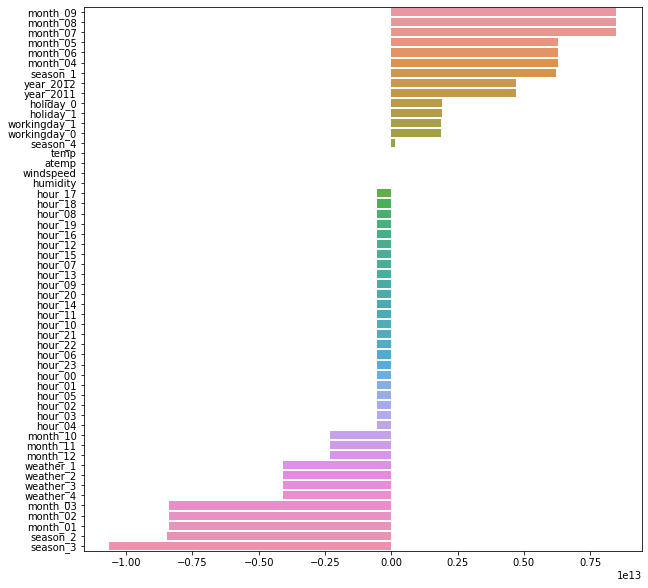

In [67]:
coef = pd.Series(reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
plt.subplots(1, 1, figsize=(10,10))
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### <a href = "https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C">평가지표</a>

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

origin = np.array(y_test)
pred = np.array(np.abs(reg.predict(X_test)))


MAE =  mean_absolute_error(origin, pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(origin, pred)

RMSLE = np.sqrt(mean_squared_log_error(origin, pred))

R2 = r2_score(origin, pred)

print(MAE)
print(MSE)
print(RMSE)
print(MSLE)
print(RMSLE)
print(R2)

73.20878045104868
9954.044342880554
99.76995711575982
1.084955908883284
1.0416121681716684
0.6871531715396223


## Ridge Regression

### 릿지 회귀의 비용함수

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99BE24355C90F8522D" width = 400 height = 200></img>

#### Ridge의 비용함수는 RSS(최소 제곱법) +(α/2 *계수의 제곱합)(L2 규제)으로 구성되어 있다.

#### α가 클수록 릿지회귀의 계수 추정치는 0에 가까워 진다. 

In [17]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha = .5)

reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [18]:
ridge.coef_

array([   2.36277962,    2.24649455,   -0.84246364,   -0.60314545,
        -32.37976781,    9.49194411,    2.08334222,   20.80448147,
          3.59930051,   -3.59930051,   -0.85168065,    0.85168065,
         26.14921101,   15.31993227,  -41.46914328,    0.        ,
        -44.36795024,   44.36795024,  -26.41921635,  -10.31458342,
          4.35403197,  -13.00582537,   16.15464359,    6.34312589,
        -13.91315216,   -7.81060702,   23.8071014 ,   17.88248692,
          3.2896308 ,   -0.36763624, -127.10189846, -141.15174079,
       -155.01896262, -163.18479224, -170.90294059, -151.34126849,
        -92.80822802,   36.7241559 ,  188.96816773,   38.32072948,
        -14.24809368,   10.41811771,   46.6130794 ,   46.94829978,
         28.51737703,   41.95056268,   99.81803716,  254.65314454,
        230.87525636,  118.67817868,   36.2682955 ,  -17.41534832,
        -54.60832974,  -90.97179901])

In [19]:
ridge.intercept_

127.57307856417685

In [11]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000]}

Ridge_reg = GridSearchCV(linear_model.Ridge(), param_grid, cv = 5)

In [12]:
Ridge_reg.fit(X_train, y_train)
Ridge_reg.score(X_train, y_train)

0.690399033861258

In [13]:
Ridge_reg.predict(X_test)

array([299.73980308,  94.34937941, 361.59461112, ...,  73.70188712,
       289.11037907, 224.58912676])

In [14]:
Ridge_reg.score(X_test, y_test)

0.6997681112640106

In [15]:
print(Ridge_reg.best_params_)
print(Ridge_reg.best_score_)

{'alpha': 0.5}
0.6849655499672013


## RidgeCV

#### Ridge를 교차검증하여 회귀분석을 실시한다. LOOCV(Leave-one-out cross validation)로 실행한다는 점을 제외하고 GridSearchCV와 동일하게 작동한다.
#### ※ GridSearchCV는 K-fold cross vaildation
#### ※ K-fold cross vaildation : 전체 데이터를 k개의 데이터 폴드로 분할하여 각 반복마다 test set을 다르게 하여 k번 교차검증하는 방법이다. 각 데이터 폴드의 검증 결과들을 평균내어 최종적인 검증 결과로 도출한다.
#### ※ LOOCV(Leave-one-out cross validation) : 리브-p-아웃 교차 검증(Leave-p-out cross validation)에서 p값이 1인 교차검증으로 리브-p-아웃 교차 검증은 전체 데이터 중에서 p개의 샘플을 선택하여 그것을 검증데이터로 사용하는 방법이다. 그래서 LOOCV는 전체 데이터 중 검증 데이터 비중이 적어 많은 데이터를 훈련데이터로 사용 할 수 있기 때문에 리브-p-아웃 교차 검증(Leave-p-out cross validation)보다 시간부담이 적고 더 좋은 결과를 낼 수 있다. 

In [30]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000]).fit(X_train, y_train)
#alphas : 여러개의 규제값 alpha들을 리스트 형태로 입력한다.

In [31]:
clf.score(X_train, y_train)

0.690399033861258

In [32]:
pred = clf.predict(X_test)

In [33]:
clf.score(X_test, y_test)

0.699768111288134

In [34]:
print("alpha : ", clf.alpha_)
print("best score : ", clf.best_score_)

alpha :  0.5
best score :  -10396.956781373226


## Lasso Regression

### 라쏘 회귀의 비용함수

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99B45E355C90F8532C" width = 350 height = 150></img>

#### Lasso의 비용함수는 RSS + (α *계수의 절댓값의 합)(L1 규제)으로 구성되어 있다.

#### Lasso는 몇몇 유의미하지 않은 변수들에 대해 계수를 0에 가깝게 추정하여 변수 선택효과를 가져오게 된다. 파라미터 크기에 관계없이 같은 수준의 규제를 적용하기 때문에 작은 값의 파라미터를 0으로 만들어 해당 변수를 모델에서 삭제하고 모델을 단순하게 만들어준다.
#### Lasso는 Closed form solution을 가지고 있지 않아 해를 구하는데 큰 Resource가 소요될 수 있고, 변수간 상관관계가 높으면 하나의 변수만 채택하고 나머지는 0으로 만들어 버리는 경우가 있어 상관관계가 높은 데이터 셋에 적용하기 어려운 단점이 있으나, 활용 가능한 변수를 채택할 수 있다는 장점이있다.

#### ※ Closed form solution : 문제에 대한 해답을 식으로 명확하게 제시 할 수 있다는 것을 의미

In [95]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha= 0.1, random_state = 0)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=0)

In [96]:
lasso.predict(X_test)

array([300.46575845,  87.87019307, 358.14246207, ...,  75.06615709,
       284.12355448, 221.84740306])

In [97]:
lasso.score(X_train, y_train)

0.6900863416243931

In [98]:
lasso.score(X_test, y_test)

0.6993611697985453

In [99]:
lasso.coef_

array([ 2.77952035e+00,  2.20885257e+00, -8.98877072e-01, -5.84224458e-01,
       -4.72529635e+01,  6.39741780e-02, -1.11682806e+01,  1.60422412e+01,
        4.36177185e+00, -6.09044124e-15, -1.32842752e+00,  0.00000000e+00,
        1.00976567e+01, -0.00000000e+00, -5.44704448e+01,  0.00000000e+00,
       -8.78369825e+01,  0.00000000e+00, -1.56700773e+01, -7.37291157e-02,
        1.06846750e+01, -1.10914428e+01,  1.49668938e+01,  3.28683684e+00,
       -1.22679314e+01, -5.50499742e+00,  2.54577002e+01,  1.26844260e+01,
        0.00000000e+00, -3.55092647e-01, -1.48304057e+02, -1.62067580e+02,
       -1.75727266e+02, -1.83598630e+02, -1.91016220e+02, -1.71506728e+02,
       -1.12942381e+02,  1.16908438e+01,  1.63917445e+02,  1.22912282e+01,
       -3.60853402e+01, -1.20113247e+01,  1.91830858e+01,  1.89201669e+01,
        1.26338672e-01,  1.34666197e+01,  7.15761574e+01,  2.26923634e+02,
        2.03511948e+02,  9.16126197e+01,  9.50682073e+00, -3.91088211e+01,
       -7.59994393e+01, -

In [100]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000]}

Lasso_reg = GridSearchCV(linear_model.Lasso(random_state = 0), param_grid, cv = 5)

In [101]:
Lasso_reg.fit(X_train, y_train)
Lasso_reg.score(X_train, y_train)

0.6904004965827627

In [102]:
Lasso_reg.predict(X_test)

array([299.74196345,  94.62373464, 361.61697426, ...,  73.57022178,
       289.2377288 , 224.82709627])

In [103]:
Lasso_reg.score(X_test,y_test)

0.6997629780460077

In [104]:
Lasso_reg.best_params_

{'alpha': 0.001}

In [105]:
Lasso_reg.best_score_

0.6849612688962072

In [106]:
from sklearn.metrics import mean_squared_error

origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

print(RMSE)

102.14219132965218


### LassoCV and LassoLarsCV

#### LassoCV와 LassoLarsCV는 Ridge와 달리 EstimatorCV라는 추정기를 교차검증으로 사용한다. 하지만 EstimatorCV는 GridSearchCV와 같다고 봐도 무방하다.

#### LassoCV는 Lasso회귀를 GridSerchCV를 이용한것 처럼 K-fold 교차검증을 이용하여 가장 좋은 성능을 낼 수 있는 파라미터를 찾아 모델을 실행한다. 

#### LassoLarsCV는 LassoCV에 Lars알고리즘을 적용한 모델이다.
#### ※ <a href = "https://direction-f.tistory.com/77">LARS 알고리즘</a> : Lasso가 Closed form의 해를 가지고 있지 않아 Lasso의 계산 측면에서의 단점을 극복하기 위해 활용하는 알고리즘이다.

In [107]:
from sklearn.linear_model import LassoCV
reg = LassoCV(alphas=[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000], cv = 5, random_state = 0).fit(X_train, y_train)
#alphas : 여러개의 규제값 λ들을 리스트 형태로 입력한다.
#cv : K-fold cross-vaildation에서 K값을 입력한다.

In [108]:
reg.score(X_train,y_train)

0.6904004965827627

In [109]:
reg.predict(X_test)

array([299.74196345,  94.62373464, 361.61697426, ...,  73.57022178,
       289.2377288 , 224.82709627])

In [110]:
reg.score(X_test, y_test)

0.6997629780460077

In [111]:
reg.coef_

array([ 2.34030737e+00,  2.24757185e+00, -8.37757601e-01, -6.04991596e-01,
       -5.70557581e+01,  7.99572063e-01, -1.09479549e+01,  9.14001824e+00,
        7.14555796e+00, -5.77560984e-14, -1.71196190e+00,  0.00000000e+00,
        2.39868229e+01,  1.31110697e+01, -4.37835263e+01,  0.00000000e+00,
       -8.87776610e+01,  0.00000000e+00, -1.67882764e+01, -6.20033835e-01,
        1.41262857e+01, -1.91431441e+01,  1.00416630e+01,  3.50196013e-01,
       -1.54878873e+01, -9.40979307e+00,  2.20795941e+01,  1.46983587e+01,
        0.00000000e+00, -3.68583302e+00, -1.60809416e+02, -1.74899135e+02,
       -1.88802610e+02, -1.97006290e+02, -2.04753810e+02, -1.85157308e+02,
       -1.26528816e+02,  3.18105808e+00,  1.55677826e+02,  4.84734071e+00,
       -4.77163809e+01, -2.29730947e+01,  1.32640566e+01,  1.36339086e+01,
       -4.75654180e+00,  8.65727833e+00,  6.66035054e+01,  2.21667507e+02,
        1.97819920e+02,  8.54185370e+01,  2.84589337e+00, -5.08964540e+01,
       -8.81686010e+01, -

In [112]:
print("alpha : ", reg.alpha_)

alpha :  0.001


In [113]:
from sklearn.metrics import mean_squared_error

origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

print(RMSE)

102.14219132965218


In [114]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv = 5, random_state = 0).fit(X_train, y_train)
#alpha의 default는 None

In [115]:
reg.coef_

array([ 3.77419361e+00,  3.14317410e+00, -1.47356043e+00, -3.35008399e-01,
       -2.04071941e+01,  0.00000000e+00, -9.33056297e+00,  3.75079195e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.28642270e-01, -0.00000000e+00, -3.26931646e+01,  0.00000000e+00,
       -8.05433637e+01,  0.00000000e+00, -5.32954456e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.15299801e+01,  0.00000000e+00,
       -1.04386208e+01, -0.00000000e+00,  1.82173735e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.01676212e+02, -1.13368066e+02,
       -1.25468388e+02, -1.30668406e+02, -1.35723146e+02, -1.16933723e+02,
       -5.89043412e+01,  1.51093086e+01,  1.65889911e+02,  8.02239686e+00,
       -0.00000000e+00, -0.00000000e+00,  4.37545348e+00,  4.00366606e-01,
        0.00000000e+00,  0.00000000e+00,  5.10523811e+01,  2.07778107e+02,
        1.87646988e+02,  7.90075451e+01,  3.01923480e-01, -0.00000000e+00,
       -3.21631266e+01, -

In [116]:
reg.alpha_

1.0980451057102112

In [117]:
reg.score(X_train, y_train)

0.6636710685912945

In [118]:
reg.score(X_test, y_test)

0.6729340344838035

In [119]:
pred = reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error

origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

print(RMSE)

102.14219132965218


In [121]:
from sklearn.linear_model import LassoLarsCV

reg = LassoLarsCV(cv=5, normalize=False).fit(X_train, y_train)
reg.score(X_train,y_train)

0.6687292356194762

In [122]:
reg.alpha_

9.604449052925239e-14

In [123]:
pred = reg.predict(X_test)

In [124]:
from sklearn.metrics import mean_squared_error

origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

print(RMSE)

101.36199734448485


## ElasticNet

### 엘라스틱넷의 비용함수
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFDF355C90F8532C" width = 400></img>

#### Ridge와 Lasso의 결합형태로 Ridge와 Lasso의 장단점을 모두 가지고있다.

In [125]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha = .5, random_state=0).fit(X_train, y_train)

In [126]:
regr.coef_

array([  3.76874621,   4.8888908 ,  -2.54298753,   0.37915132,
        -8.3191845 ,  -0.52325784, -10.3220869 ,  21.16437428,
         0.04461231,  -0.0446207 ,   0.        ,  -0.        ,
        -0.2341144 ,   4.5044096 ,  -3.27031005,   0.        ,
       -26.39173584,  26.39168022,  -2.30008488,  -1.64247148,
        -2.37635674,  -2.19326312,   4.74728202,  -3.0771766 ,
       -10.60373128,  -7.24106058,   7.52226162,   5.30967383,
         5.71182032,   8.14305444, -15.44862014, -16.64982079,
       -17.80925541, -17.75753188, -17.91897313, -15.60765196,
        -7.67365626,   8.24433255,  30.57350192,   5.58866058,
        -1.74947134,  -0.        ,   2.36066902,   1.17029519,
        -0.89688166,  -0.        ,   7.96033846,  30.70086788,
        28.94607756,  13.71919341,   3.29064782,  -1.7832047 ,
        -6.10049996, -10.53845431])

In [127]:
regr.intercept_

151.43609302098167

In [129]:
print("train score : ", regr.score(X_train, y_train))
print("test score : ", regr.score(X_test, y_test))

train score :  0.3928719213084134
test score :  0.4065095101595648


In [130]:
pred = regr.predict(X_test)

In [131]:
origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)
RMSE = np.sqrt(MSE)

print(RMSE)

137.5923778204638


## Stochastic Gradient Descent(SGD)

#### 확률적 경사 하강법이라 하며 손실함수를 줄이기 위해 비용함수를 미분하여 그 미분값이 최소가 되는 지점을 찾아 알맞은 weight를 찾아내는 방법이다.

#### SGD는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래이디언트를 계산한다. -> 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 알고리즘이 훨씬 빨라진다.

#### SGD는 말그대로 확률적이므로 1개의 샘플을 무작위로 선택하기 때문에 배치 경사 하강법 보다는 불안정하다. 


In [27]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(loss='squared_error', penalty='l2', max_iter = 5).fit(X_train,y_train)

print(reg.score(X_train, y_train))

-6.070482908151415e+19


In [28]:
reg.score(X_test, y_test)

-6.230711842733931e+19

In [29]:
reg.coef_

array([-1.63547217e+10, -2.97964839e+10, -3.53364445e+09, -1.25278457e+10,
       -3.34556233e+10,  5.10662666e+10, -3.70926805e+10,  3.31983392e+10,
        1.61788175e+10, -2.46251542e+09,  9.17905901e+09,  4.53724305e+09,
        1.09059643e+10, -1.71166267e+10,  1.84368499e+10,  1.49011450e+09,
       -5.57375814e+09,  1.92900602e+10, -3.13469886e+10,  1.97978162e+10,
       -2.19064510e+10,  4.14039762e+10, -8.12550286e+09,  1.77877933e+10,
       -4.28692932e+09,  3.71142274e+09, -3.65171739e+10,  4.17152951e+10,
       -1.50079207e+10,  6.49096481e+09, -3.54113802e+10, -3.66481191e+10,
        3.45378631e+10,  2.52104976e+10,  1.67284962e+10, -4.35812170e+10,
       -3.11584038e+09,  1.42610549e+09, -1.48046520e+09, -8.34764181e+09,
        2.30445193e+10,  2.46050413e+10, -4.27748079e+09,  3.74252871e+10,
       -1.12857666e+10,  3.07257407e+10, -1.01392520e+10, -1.09490869e+10,
        1.50482792e+10, -8.91366403e+09,  5.96642279e+09,  1.57341474e+10,
       -1.55543874e+10, -

In [30]:
pred = reg.predict(X_test)

In [31]:
pred

array([-1.79273794e+12, -9.85642086e+11, -1.77643596e+12, ...,
       -1.40097798e+12, -7.73461979e+11, -8.89672697e+11])

In [32]:
from sklearn.metrics import mean_squared_error

origin = np.array(y_test)
pred = np.array(pred)

MSE = mean_squared_error(origin, pred)

RMSE = np.sqrt(MSE)

print(RMSE)

1409895865306.7764


In [34]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(loss='huber', penalty='l2', max_iter = 5).fit(X_train,y_train)

print(reg.score(X_train, y_train))

0.17491560409871876


In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

SGD_reg = GridSearchCV(SGDRegressor(penalty='l2', max_iter = 5), param_grid, cv = 5)

In [40]:
SGD_reg.fit(X_train, y_train)
SGD_reg.score(X_train, y_train)

0.17091440052328688

In [41]:
SGD_reg.best_params_

{'loss': 'huber'}

In [42]:
SGD_reg.best_score_

0.1641211425951527